In [1]:
from PIL import Image
import numpy as np
import os
import timeit
from shutil import copyfile
import time
from collections import Counter

In [125]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np

%matplotlib inline

impath='small/training/ADE_train_00000341.jpg'

# Read in the image
image = mpimg.imread(impath)

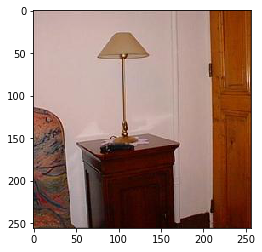

In [127]:
# Read in the image
image_mask = mpimg.imread('small/training/ADE_train_00000341_seg.png')

plt.imshow(image)

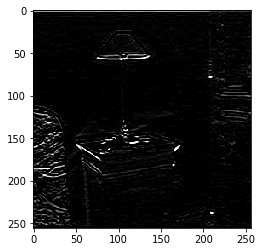

In [120]:
# Convert to grayscale for filtering
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')

# Create a custom kernel

# 3x3 array for edge detection
sobel_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])

# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)  
filtered_image = cv2.filter2D(gray, -1, sobel_y)

plt.imshow(filtered_image, cmap='gray')

In [121]:
right_sobel = np.array([-1,0,1,
                        -2,0,2,
                        -1,0,1]).reshape(3,3)
left_sobel = np.array([1,0,-1,
                       2,0,-2,
                       1,0,-1]).reshape(3,3)
bottom_sobel = np.array([-1,-2,-1,
                          0,0,0,
                          1,2,1]).reshape(3,3)
top_sobel = np.array([1,2,1,
                      0,0,0,
                     -1,-2,-1]).reshape(3,3)
sharpen = np.array([0,-1,0,
                    -1,5,-1,
                     0,-1,0]).reshape(3,3)
emboss = np.array([-2,1,0,
                  -1,1,1,
                  0,1,2]).reshape(3,3)

In [122]:
def apply_kernel(m,k):
    new = m.copy()
    for r in range(253):
        for c in range(253):
            face = np.array([m[r][c],m[r][c+1],m[r][c+2],
                             m[r+1][c],m[r+1][c+1],m[r+1][c+2],
                             m[r+2][c],m[r+2][c+1],m[r+2][c+2]]).reshape(3,3)
            new_val = int(np.sum(face*k))
            if new_val<=0:
                new_val = 0
            elif new_val>=255:
                new_val = 255
            new[r][c] = new_val
    return new

def show_image(im,name):
    plt.title(name)
    plt.imshow(Image.fromarray(im))
    plt.show()

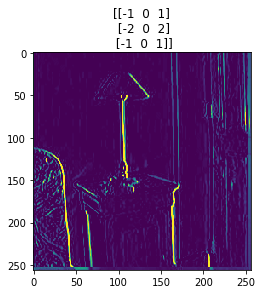

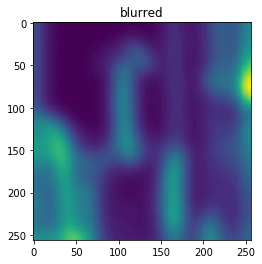

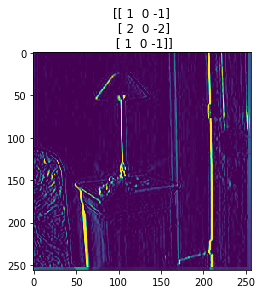

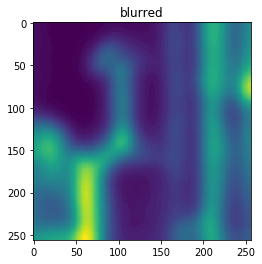

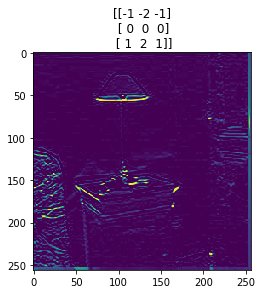

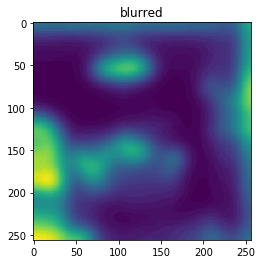

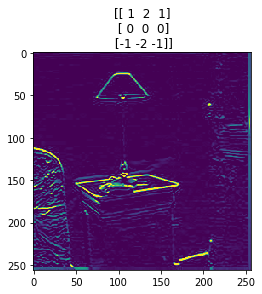

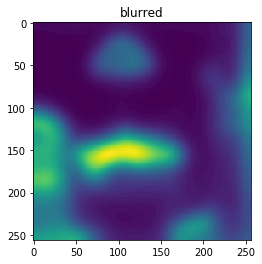

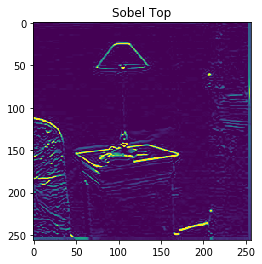

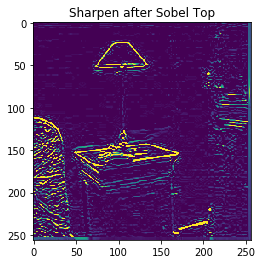

---


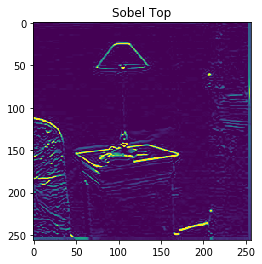

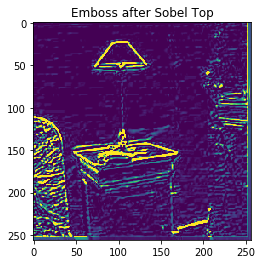

In [126]:
im = Image.open(impath).convert('L')
grid = np.array(im)
output_grid = grid.copy()

final_grids = []
final_blur = []

for mask in [right_sobel, left_sobel,bottom_sobel,top_sobel]:
    output_grid = apply_kernel(grid, mask)
    final_grids.append(output_grid)
    blurred1 = gaussian_filter(output_grid, sigma=10)
    blurred2 = gaussian_filter(output_grid, sigma=15)
    final_blur.append(blurred2-blurred1)
    show_image(output_grid,mask)
    show_image(np.abs(blurred2+blurred1)/2,'blurred')
    
show_image(final_grids[3],'Sobel Top')
kernel_two = apply_kernel(final_grids[3],sharpen)
show_image(kernel_two,'Sharpen after Sobel Top')
print('---')
show_image(final_grids[3],'Sobel Top')
kernel_two = apply_kernel(final_grids[3],emboss)
show_image(kernel_two,'Emboss after Sobel Top')

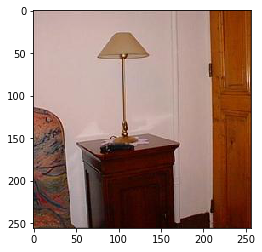

In [129]:
plt.imshow(image)
plt.show()

In [124]:
pprint(final_grids[3][77:83,10:30])

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   4,   0],
       [ 20,   0,   0,   0,   0,   2,  13,   0,   0,   0,   0,   0,   4,
         23,   0,   0,   0,  56,  93,  55],
       [177, 167, 144,  84,  37,  55,  95, 112, 113, 122, 138, 135, 108,
         68,  24,   0,   0,  14,  19,   0],
       [243, 255, 255, 251, 225, 220, 220, 237, 255, 255, 255, 255, 250,
        212, 230, 255, 234, 176, 142, 156],
       [ 72, 120, 174, 227, 253, 236, 201, 175, 168, 177, 196, 224, 245,
        255, 255, 255, 255, 255, 255, 255],
       [  8,  32,  49,  66,  70,  48,  21,   0,   0,   0,   0,  21,  83,
        122, 125, 109,  96,  97, 114, 140]], dtype=uint8)


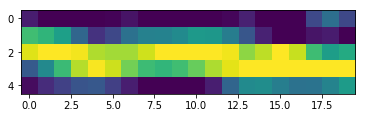

In [87]:
plt.imshow(final_grids[3][78:83,10:30])

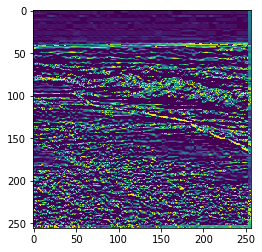

In [56]:
plt.imshow((final_grids[0]+final_grids[1]+final_grids[2]+final_grids[3])/4)

In [15]:
from scipy.ndimage.filters import gaussian_filter

In [16]:
type(final_grids)

list

"Difference of Gaussians"

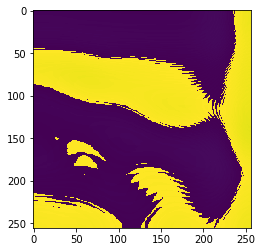

In [47]:
plt.imshow(Image.fromarray(np.abs(blurred2-blurred1)))
plt.show()

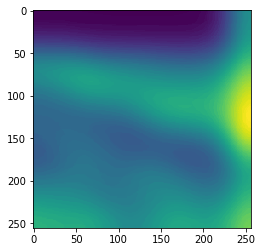

In [37]:
plt.imshow(Image.fromarray(np.abs(blurred2+blurred1)/2))
plt.show()

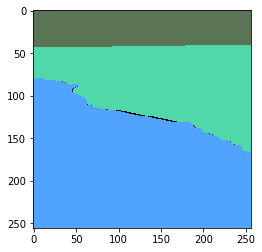

In [38]:
plt.imshow(image_mask)
plt.show()

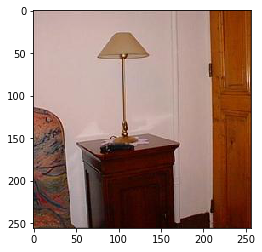